<a href="https://colab.research.google.com/github/ntkl06/khanhlinh06.github.io/blob/main/buoi04_250909_EDA_Fin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Phân loại loài hoa Iris**

In [5]:
# !pip install pandas_datareader
!pip install yfinance
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.5 MB/s eta 0:00:00


In [15]:
# !pip install --user yfinance==0.1.36

In [17]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import mplfinance as mpf
import seaborn as sns
import datetime as dt
%matplotlib inline

# sửa lỗi tải dữ liệu của pandas_datareader
from IPython.display import display
import yfinance as yf
# yf.pdr_override() # This line is no longer needed

In [18]:
end = dt.datetime.now()
start = dt.datetime(2016, 1, 1)
print(f'{start} -> {end}')

df = yf.download('AAPL', start, end)

# Simplify column names after downloading
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

2016-01-01 00:00:00 -> 2025-10-21 15:57:42.020503


[*********************100%***********************]  1 of 1 completed


In [19]:
display(df.head())
display(df.tail())

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2016-01-04,23.776184,23.780699,23.020131,23.157801,270597600
2016-01-05,23.180368,23.889027,23.112663,23.866459,223164000
2016-01-06,22.726730,23.103630,22.539411,22.695134,273829600
2016-01-07,21.767563,22.598093,21.763050,22.270847,324377600
2016-01-08,21.882660,22.367888,21.837523,22.241504,283192000


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-10-15,249.339996,251.820007,247.470001,249.490005,33893600
2025-10-16,247.449997,249.039993,245.130005,248.250000,39777000
2025-10-17,252.289993,253.380005,247.270004,248.020004,49147000
2025-10-20,262.239990,264.380005,255.630005,255.889999,90370300
2025-10-21,263.980011,265.290009,261.880005,261.880005,24015563


In [20]:
df.loc['2024-04-19']

,,2024-04-19
Price,Ticker,
Close,AAPL,1.638236e+02
High,AAPL,1.652136e+02
Low,AAPL,1.629101e+02
Open,AAPL,1.650249e+02
Volume,AAPL,6.814940e+07


In [28]:
# Select the 'Close' price using .xs()
df_close = df.xs('Close', level='Price', axis=1)

# Save the simplified DataFrame to CSV
df_close.to_csv('AAPL_close.csv')

# Read the CSV back, setting 'Date' as the index
df1 = pd.read_csv('AAPL_close.csv', index_col='Date')

display(df1.head())

,AAPL
Date,
2016-01-04,23.776184
2016-01-05,23.180368
2016-01-06,22.726730
2016-01-07,21.767563
2016-01-08,21.882660


In [23]:
temp_df = pd.read_csv('AAPL.csv')
print(temp_df.columns)
display(temp_df.head())

Index(['Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


,Price,Close,High,Low,Open,Volume
0,Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
1,Date,NaN,NaN,NaN,NaN,NaN
2,2016-01-04,23.77618408203125,23.780698797468812,23.02013110102629,23.157800650261578,270597600
3,2016-01-05,23.180368423461914,23.889027204011935,23.112663190498044,23.86645879302398,223164000
4,2016-01-06,22.726730346679688,23.103629776733978,22.539411032061107,22.695134234726723,273829600


<Axes: title={'center': 'AAPL'}, xlabel='Date'>

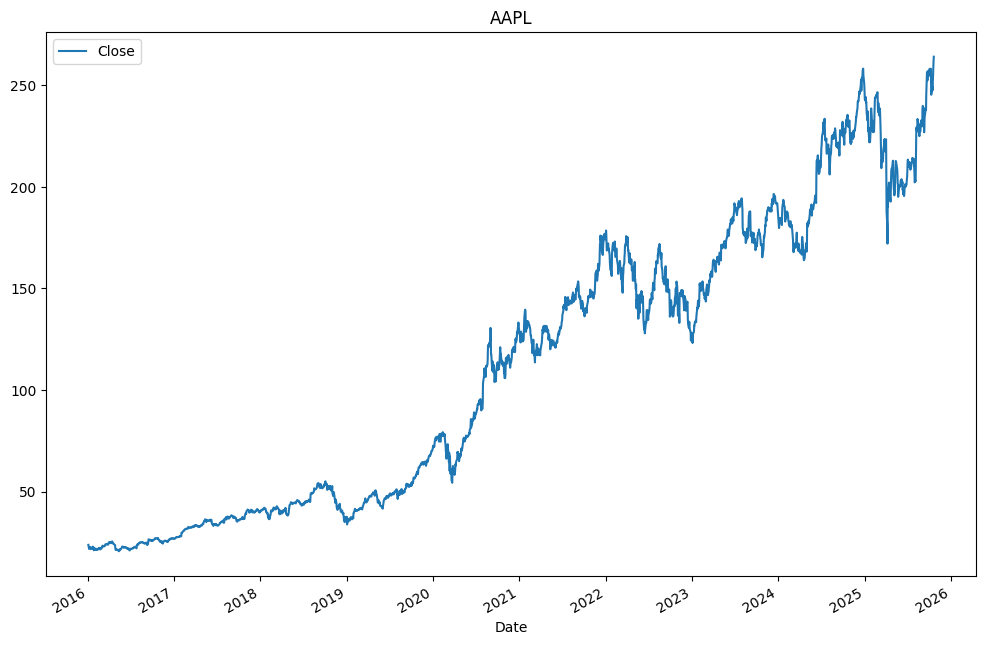

In [35]:
# Now plot the 'Close' column from the df_close DataFrame
df_close['AAPL'].plot(legend=True, figsize=(12,8), title='AAPL', label = 'Close')

Text(0, 0.5, 'Volume')

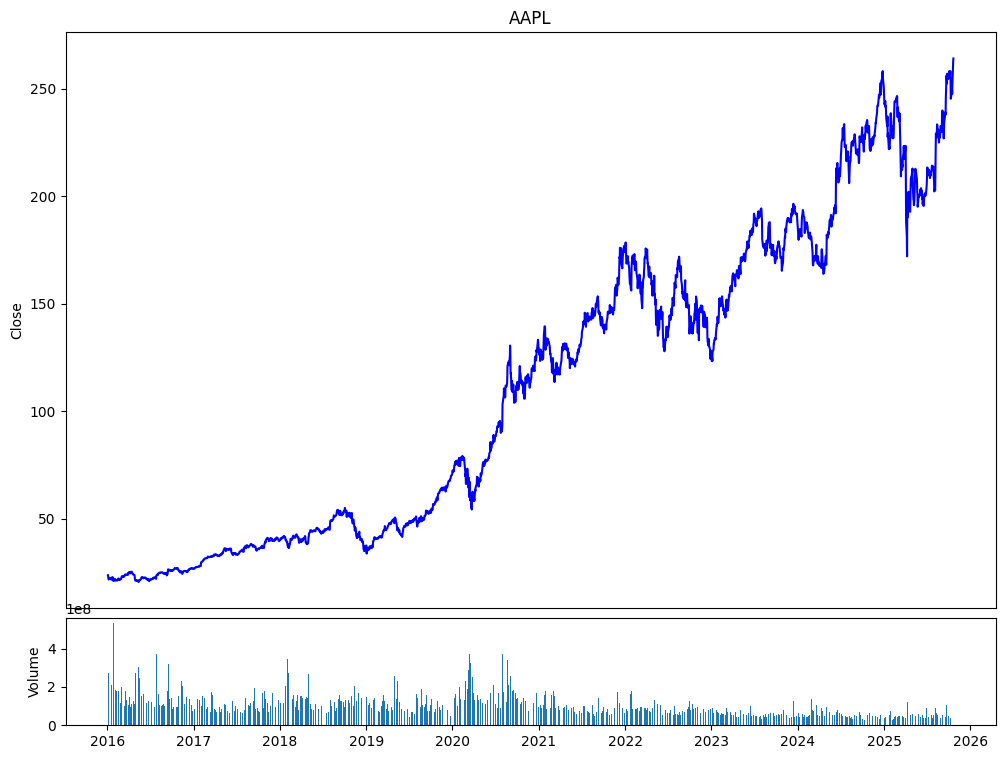

In [45]:
plt.figure(figsize=(12, 9))

top = plt.subplot2grid((12, 9), (0, 0), rowspan=10, colspan=9)
bottom = plt.subplot2grid((12, 9), (10, 0), rowspan=2, colspan=9)

# Simplify column names within this cell to ensure correctness
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Select 'Close' and 'Volume' from the DataFrame with simplified column names
df_close_plot = df['Close']
df_volume_plot = df['Volume']


top.plot(df_close_plot.index, df_close_plot, color='blue')
bottom.bar(df_volume_plot.index, df_volume_plot)


top.axes.get_xaxis().set_visible(False)
top.set_title('AAPL')
top.set_ylabel('Close')
bottom.set_ylabel('Volume')

In [46]:
df.index

DatetimeIndex(['2016-01-04', '2016-01-05', '2016-01-06', '2016-01-07',
               '2016-01-08', '2016-01-11', '2016-01-12', '2016-01-13',
               '2016-01-14', '2016-01-15',
               ...
               '2025-10-08', '2025-10-09', '2025-10-10', '2025-10-13',
               '2025-10-14', '2025-10-15', '2025-10-16', '2025-10-17',
               '2025-10-20', '2025-10-21'],
              dtype='datetime64[ns]', name='Date', length=2465, freq=None)

**End**